<a href="https://colab.research.google.com/github/AgentZero2483/Algorithm-Trading/blob/main/Bollinger_Bands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This project attemps to use Bollinger band  to determine when to buy and sell stocks. 

In [ ]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime
import time
import math
import plotly.graph_objects as go

In [ ]:
#Pull data yahoo finance
#get the stock quote
#Create input log for our ticker to search. for now we'll use TSLA as a practice stock
ticker = 'TSLA' #input("Enter your Ticker: ") 
print(ticker)

#Create Variables for query string
current_time = datetime.datetime.now() 
year = current_time.year
month = current_time.month
day = current_time.day
hour = current_time.hour
minute = current_time.minute

start_year = 2011 #int(input("Enter your Start Year: "))
start_month = 7 #int(input("Enter your Start month: "))
start_day = 7 #int(input("Enter your Start day: "))

#datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
#period1 = int(time.mktime(datetime.datetime(2020, 6, 22, 23, 59).timetuple())) #'1516406400'
period1 = int(time.mktime(datetime.datetime(start_year, start_month, start_day, hour, minute).timetuple())) #'1516406400'
#time.mktime converts our ouptput into second values
period2 = int(time.mktime(datetime.datetime(year, month, day, hour, minute).timetuple())) #'1624147200'
interval = '1wk' #'1d' #'1wk' '1m'

#Create query string to download stock data using variables created above
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

#read in query string to a pandas dataframe
df = pd.read_csv(query_string)
df

#Reindex dataframe by date
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

TSLA


,Date,Open,High,Low,Close,Adj Close,Volume
2011-07-04,2011-07-04,5.828000,6.000000,5.718000,5.762000,5.762000,12842500
2011-07-11,2011-07-11,5.680000,5.818000,5.450000,5.516000,5.516000,24776000
2011-07-18,2011-07-18,5.468000,6.088000,5.326000,5.858000,5.858000,32606500
2011-07-25,2011-07-25,5.802000,5.850000,5.500000,5.634000,5.634000,21396500
2011-08-01,2011-08-01,5.734000,5.840000,4.566000,4.848000,4.848000,47688500
...,...,...,...,...,...,...,...
2021-06-28,2021-06-28,671.640015,700.000000,670.320007,678.900024,678.900024,103623400
2021-07-05,2021-07-05,681.710022,684.000000,620.460022,656.950012,656.950012,82968300
2021-07-12,2021-07-12,662.200012,693.280029,637.880005,644.219971,644.219971,105083700
2021-07-19,2021-07-19,629.890015,664.859985,621.289978,649.260010,649.260010,65726200


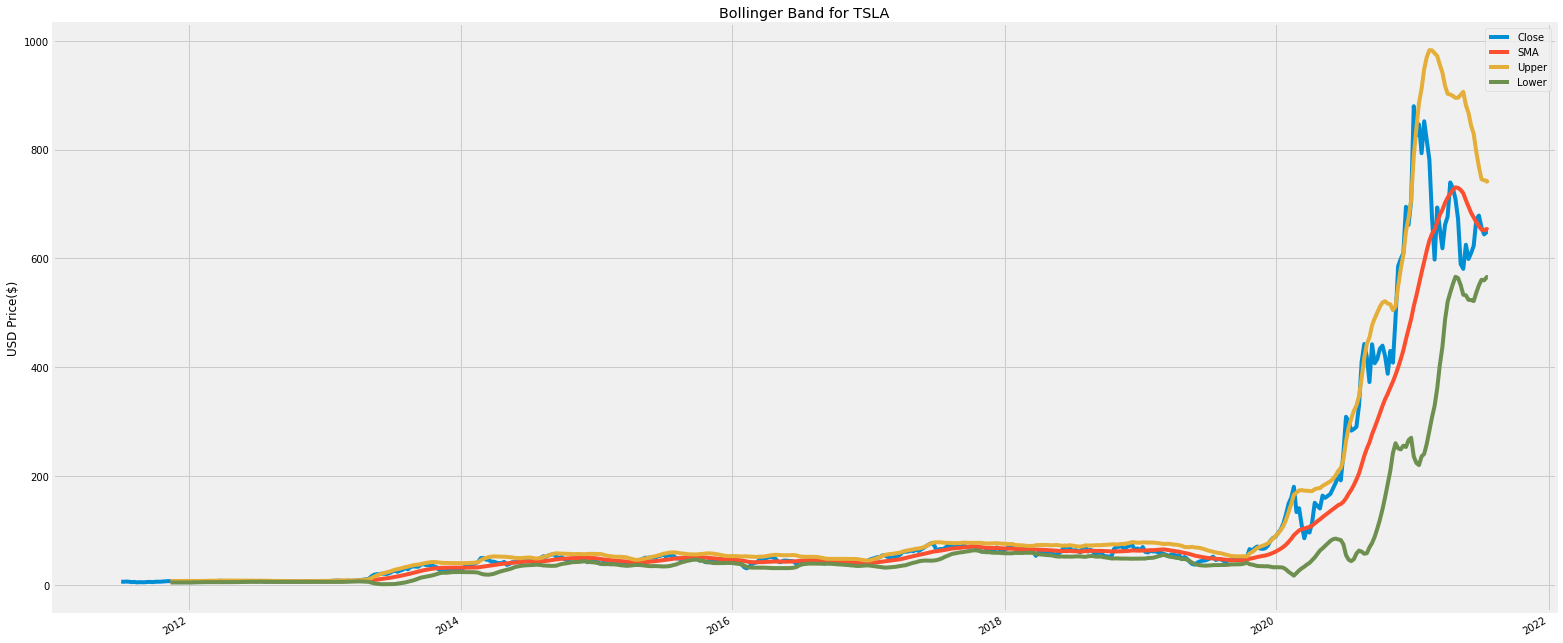

In [ ]:
#Calc SMA, upper, lower, EMA and std
#Create time period variable
period = 20
#Calc EMA
df['EMA'] = df.Close.ewm(span=period, adjust=False).mean()
#Calc SMA
df['SMA'] = df['Close'].rolling(window=period).mean()
#Calc std
df['std'] = df['Close'].rolling(window=period).std() 
#Calc Upper Bollinger Band
df['UpperEMA'] = df['EMA'] + (df['std'] * 2)
df['Upper'] = df['SMA'] + (df['std'] * 2)
#Calc Lower Bollinger Band
df['LowerEMA'] = df['EMA'] - (df['std'] * 2)
df['Lower'] = df['SMA'] - (df['std'] * 2)

#Create a list of columns to keep
column_list = ['Close', 'SMA', 'Upper', 'Lower']
#Plot the data
df[column_list].plot(figsize=(24, 12))
plt.title(f'Bollinger Band for {ticker}')
plt.ylabel('USD Price($)')
plt.show()

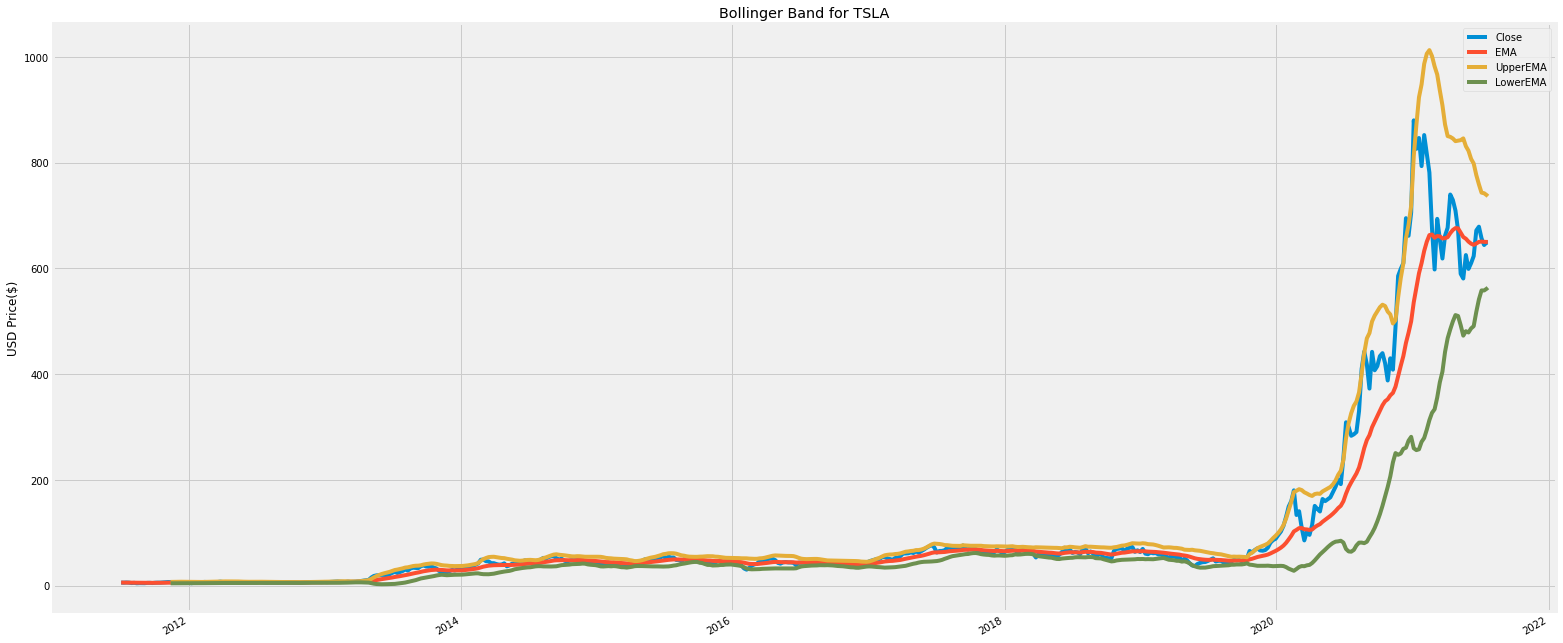

In [ ]:
#Create a list of columns to keep
column_list = ['Close', 'EMA', 'UpperEMA', 'LowerEMA']
#Plot the data
df[column_list].plot(figsize=(24, 12))
plt.title(f'Bollinger Band for {ticker}')
plt.ylabel('USD Price($)')
plt.show()

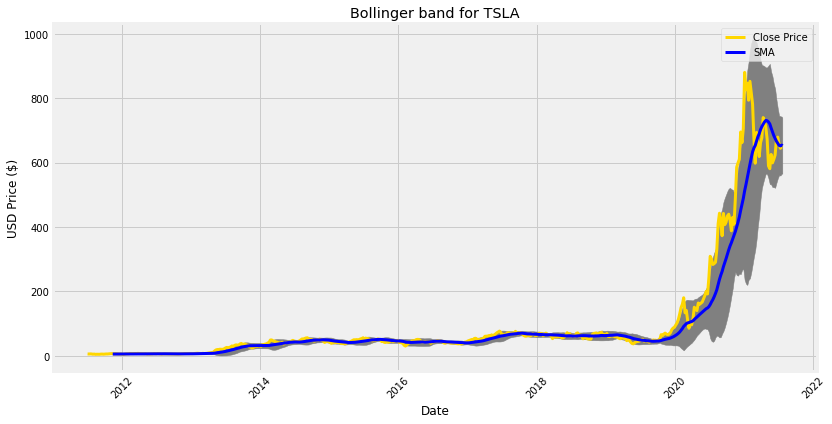

In [ ]:
#Shade area between bands
#get figure and the figure size
fig = plt.figure(figsize=(12.2, 6.4))
#Add subplot
ax = fig.add_subplot(1,1,1)
#Get index values of data frame
x_axis = df.index
#plot and shade area between upper anmd lower band 
ax.fill_between(x_axis, df['Upper'], df['Lower'], color='grey')
#Plot closing price and moving average
ax.plot(x_axis, df['Close'], color = 'gold', lw = 3, label = 'Close Price')
ax.plot(x_axis, df['SMA'], color = 'blue', lw = 3, label = 'SMA')
#Set title and show image
ax.set_title(f'Bollinger band for {ticker}')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

In [ ]:
#Create new df
new_df = df[period-1:]
#show new df
new_df

,Date,Open,High,Low,Close,Adj Close,Volume,EMA,SMA,std,UpperEMA,Upper,LowerEMA,Lower
2011-11-14,2011-11-14,6.600000,7.000000,6.508000,6.520000,6.520000,31510000,5.687442,5.445300,0.656056,6.999554,6.757412,4.375330,4.133188
2011-11-21,2011-11-21,6.488000,6.558000,6.210000,6.332000,6.332000,12278000,5.748829,5.473800,0.682390,7.113609,6.838580,4.384048,4.109020
2011-11-28,2011-11-28,6.400000,6.798000,6.326000,6.660000,6.660000,19328000,5.835607,5.531000,0.732240,7.300086,6.995479,4.371127,4.066521
2011-12-05,2011-12-05,6.706000,7.000000,5.922000,6.208000,6.208000,36657500,5.871073,5.548500,0.744545,7.360163,7.037590,4.381983,4.059410
2011-12-12,2011-12-12,6.088000,6.186000,5.596000,5.600000,5.600000,23233500,5.845256,5.546800,0.744378,7.334013,7.035557,4.356500,4.058043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-21,2021-06-21,624.479980,697.619995,608.880005,671.869995,671.869995,153549900,647.165673,666.395001,64.652477,776.470626,795.699955,517.860720,537.090048
2021-06-28,2021-06-28,671.640015,700.000000,670.320007,678.900024,678.900024,103623400,650.187992,659.534003,54.394392,758.976776,768.322787,541.399208,550.745219
2021-07-05,2021-07-05,681.710022,684.000000,620.460022,656.950012,656.950012,82968300,650.831994,653.316504,46.238981,743.309956,745.794466,558.354032,560.838542
2021-07-12,2021-07-12,662.200012,693.280029,662.159973,668.539978,668.539978,46774500,652.518469,652.968503,46.089186,744.696841,745.146875,560.340097,560.790131


In [ ]:
#Create function to get the buy and sell signals
def get_signal(data):

  buy_signal = []
  sell_signal = []

  for i in range(len(data['Close'])):
    if data ['Close'][i] > data['Upper'][i]:
      buy_signal.append(np.nan)
      sell_signal.append(df['Close'][i])
    elif data['Close'][i] < data['Lower'][i]:
      buy_signal.append(df['Close'][i])
      sell_signal.append(np.nan)
    else: 
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)

  return (buy_signal, sell_signal)


In [ ]:
#Create two new columns
new_df['Buy'] = get_signal(new_df)[0]
new_df['Sell'] = get_signal(new_df)[1]
new_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Adj Close,Volume,EMA,SMA,std,UpperEMA,Upper,LowerEMA,Lower,Buy,Sell
2011-11-14,2011-11-14,6.600000,7.000000,6.508000,6.520000,6.520000,31510000,5.687442,5.445300,0.656056,6.999554,6.757412,4.375330,4.133188,NaN,NaN
2011-11-21,2011-11-21,6.488000,6.558000,6.210000,6.332000,6.332000,12278000,5.748829,5.473800,0.682390,7.113609,6.838580,4.384048,4.109020,NaN,NaN
2011-11-28,2011-11-28,6.400000,6.798000,6.326000,6.660000,6.660000,19328000,5.835607,5.531000,0.732240,7.300086,6.995479,4.371127,4.066521,NaN,NaN
2011-12-05,2011-12-05,6.706000,7.000000,5.922000,6.208000,6.208000,36657500,5.871073,5.548500,0.744545,7.360163,7.037590,4.381983,4.059410,NaN,NaN
2011-12-12,2011-12-12,6.088000,6.186000,5.596000,5.600000,5.600000,23233500,5.845256,5.546800,0.744378,7.334013,7.035557,4.356500,4.058043,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-21,2021-06-21,624.479980,697.619995,608.880005,671.869995,671.869995,153549900,647.165673,666.395001,64.652477,776.470626,795.699955,517.860720,537.090048,NaN,NaN
2021-06-28,2021-06-28,671.640015,700.000000,670.320007,678.900024,678.900024,103623400,650.187992,659.534003,54.394392,758.976776,768.322787,541.399208,550.745219,NaN,NaN
2021-07-05,2021-07-05,681.710022,684.000000,620.460022,656.950012,656.950012,82968300,650.831994,653.316504,46.238981,743.309956,745.794466,558.354032,560.838542,NaN,NaN
2021-07-12,2021-07-12,662.200012,693.280029,662.159973,668.539978,668.539978,46774500,652.518469,652.968503,46.089186,744.696841,745.146875,560.340097,560.790131,NaN,NaN


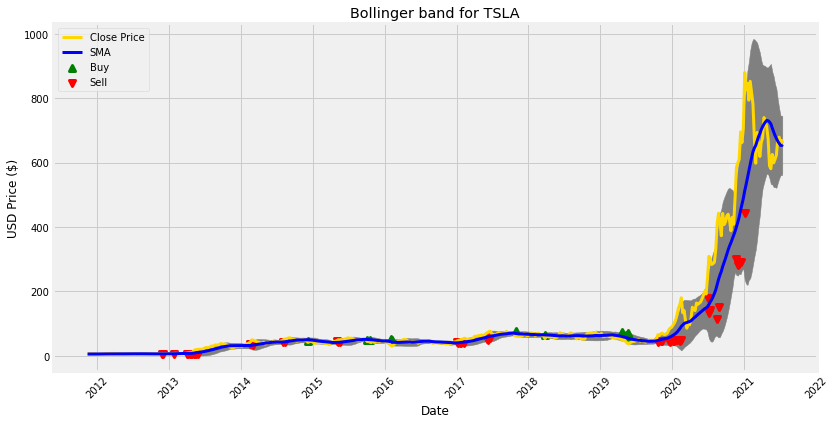

In [ ]:
#plot data
#get figure and the figure size
fig = plt.figure(figsize=(12.2, 6.4))
#Add subplot
ax = fig.add_subplot(1,1,1)
#Get index values of data frame
x_axis = new_df.index
#plot and shade area between upper anmd lower band 
ax.fill_between(x_axis, new_df['Upper'], new_df['Lower'], color='grey')
#Plot closing price and moving average
ax.plot(x_axis, new_df['Close'], color = 'gold', lw = 3, label = 'Close Price')
ax.plot(x_axis, new_df['SMA'], color = 'blue', lw = 3, label = 'SMA')
#Set title and show image
ax.set_title(f'Bollinger band for {ticker}')
ax.scatter(x_axis, new_df['Buy'], color = 'green', lw=3, label='Buy', marker ='^')
ax.scatter(x_axis, new_df['Sell'], color = 'red', lw=3, label='Sell', marker ='v')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

In [ ]:
def get_EMAsignal(data):

  buy_signal = []
  sell_signal = []

  for i in range(len(data['Close'])):
    if data ['Close'][i] > data['UpperEMA'][i]:
      buy_signal.append(np.nan)
      sell_signal.append(df['Close'][i])
    elif data['Close'][i] < data['LowerEMA'][i]:
      buy_signal.append(df['Close'][i])
      sell_signal.append(np.nan)
    else: 
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)

  return (buy_signal, sell_signal)

In [ ]:
#Create new df
EMA_df = df[period-1:]
#show new df
EMA_df

,Date,Open,High,Low,Close,Adj Close,Volume,EMA,SMA,std,UpperEMA,Upper,LowerEMA,Lower
2011-11-14,2011-11-14,6.600000,7.000000,6.508000,6.520000,6.520000,31510000,5.687442,5.445300,0.656056,6.999554,6.757412,4.375330,4.133188
2011-11-21,2011-11-21,6.488000,6.558000,6.210000,6.332000,6.332000,12278000,5.748829,5.473800,0.682390,7.113609,6.838580,4.384048,4.109020
2011-11-28,2011-11-28,6.400000,6.798000,6.326000,6.660000,6.660000,19328000,5.835607,5.531000,0.732240,7.300086,6.995479,4.371127,4.066521
2011-12-05,2011-12-05,6.706000,7.000000,5.922000,6.208000,6.208000,36657500,5.871073,5.548500,0.744545,7.360163,7.037590,4.381983,4.059410
2011-12-12,2011-12-12,6.088000,6.186000,5.596000,5.600000,5.600000,23233500,5.845256,5.546800,0.744378,7.334013,7.035557,4.356500,4.058043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-21,2021-06-21,624.479980,697.619995,608.880005,671.869995,671.869995,153549900,647.165673,666.395001,64.652477,776.470626,795.699955,517.860720,537.090048
2021-06-28,2021-06-28,671.640015,700.000000,670.320007,678.900024,678.900024,103623400,650.187992,659.534003,54.394392,758.976776,768.322787,541.399208,550.745219
2021-07-05,2021-07-05,681.710022,684.000000,620.460022,656.950012,656.950012,82968300,650.831994,653.316504,46.238981,743.309956,745.794466,558.354032,560.838542
2021-07-12,2021-07-12,662.200012,693.280029,662.159973,668.539978,668.539978,46774500,652.518469,652.968503,46.089186,744.696841,745.146875,560.340097,560.790131


In [ ]:
EMA_df['Buy'] = get_signal(EMA_df)[0]
EMA_df['Sell'] = get_signal(EMA_df)[1]
EMA_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Adj Close,Volume,EMA,SMA,std,UpperEMA,Upper,LowerEMA,Lower,Buy,Sell
2011-11-14,2011-11-14,6.600000,7.000000,6.508000,6.520000,6.520000,31510000,5.687442,5.445300,0.656056,6.999554,6.757412,4.375330,4.133188,NaN,NaN
2011-11-21,2011-11-21,6.488000,6.558000,6.210000,6.332000,6.332000,12278000,5.748829,5.473800,0.682390,7.113609,6.838580,4.384048,4.109020,NaN,NaN
2011-11-28,2011-11-28,6.400000,6.798000,6.326000,6.660000,6.660000,19328000,5.835607,5.531000,0.732240,7.300086,6.995479,4.371127,4.066521,NaN,NaN
2011-12-05,2011-12-05,6.706000,7.000000,5.922000,6.208000,6.208000,36657500,5.871073,5.548500,0.744545,7.360163,7.037590,4.381983,4.059410,NaN,NaN
2011-12-12,2011-12-12,6.088000,6.186000,5.596000,5.600000,5.600000,23233500,5.845256,5.546800,0.744378,7.334013,7.035557,4.356500,4.058043,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-21,2021-06-21,624.479980,697.619995,608.880005,671.869995,671.869995,153549900,647.165673,666.395001,64.652477,776.470626,795.699955,517.860720,537.090048,NaN,NaN
2021-06-28,2021-06-28,671.640015,700.000000,670.320007,678.900024,678.900024,103623400,650.187992,659.534003,54.394392,758.976776,768.322787,541.399208,550.745219,NaN,NaN
2021-07-05,2021-07-05,681.710022,684.000000,620.460022,656.950012,656.950012,82968300,650.831994,653.316504,46.238981,743.309956,745.794466,558.354032,560.838542,NaN,NaN
2021-07-12,2021-07-12,662.200012,693.280029,662.159973,668.539978,668.539978,46774500,652.518469,652.968503,46.089186,744.696841,745.146875,560.340097,560.790131,NaN,NaN


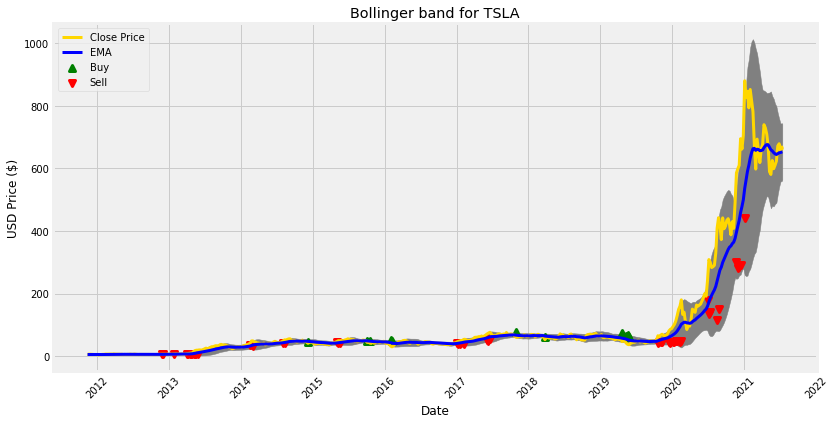

In [ ]:
#plot data
#get figure and the figure size
fig = plt.figure(figsize=(12.2, 6.4))
#Add subplot
ax = fig.add_subplot(1,1,1)
#Get index values of data frame
x_axis = EMA_df.index
#plot and shade area between upper anmd lower band 
ax.fill_between(x_axis, EMA_df['UpperEMA'], EMA_df['LowerEMA'], color='grey')
#Plot closing price and moving average
ax.plot(x_axis, EMA_df['Close'], color = 'gold', lw = 3, label = 'Close Price')
ax.plot(x_axis, EMA_df['EMA'], color = 'blue', lw = 3, label = 'EMA')
#Set title and show image
ax.set_title(f'Bollinger band for {ticker}')
ax.scatter(x_axis, EMA_df['Buy'], color = 'green', lw=3, label='Buy', marker ='^')
ax.scatter(x_axis, EMA_df['Sell'], color = 'red', lw=3, label='Sell', marker ='v')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

In [ ]:
#Plotly figure
#Plot our Stock Candlestick figure
fig = go.Figure(data = [go.Candlestick(x = df.index,
                                       open = new_df['Open'],
                                       close = new_df['Close'],
                                       high = new_df['High'],
                                       low = new_df['Low'],)
                        ]
                )
#Update our figure to add titles and turn it into plotly dark mode
fig.update_layout(title = f'{ticker} Stock Price',
              yaxis_title = f'{ticker} Stock Price USD ($)',
              xaxis_title = f'Date',
              template = 'plotly_dark')
fig.show()


In [ ]:
#Add bollinger bands to plot
fig.add_trace(
    go.Scatter(
        x = new_df.index,
        y = new_df['SMA'],
        line = dict(color = 'blue'),
        name = f'{period} Day SMA'
    )
)

fig.add_trace(
    go.Scatter(
        x = new_df.index,
        y = new_df['Upper'],
        line = dict(color = 'yellow'),
        name = f'{period} Day Upper Band'
    )
)

fig.add_trace(
     go.Scatter(
        x = new_df.index,
        y = new_df['Lower'],
        line = dict(color = 'pink'),
        name = f'{period} Day Lower Band'
    ),
)


fig.show()

In [ ]:
fig.fill_between(x_axis, EMA_df['UpperEMA'], EMA_df['LowerEMA'], color='grey')
fig.show()

AttributeError: ignored